# Getting Started

`tellus-traveler` is an unofficial Python client for [Tellus Traveler API](https://www.tellusxdp.com/docs/travelers/).

## Installation

You can install `tellus-traveler` using `pip`:

    $ pip install tellus-traveler

## Setting the API Token

Obtain an API token from https://www.tellusxdp.com/account/setting/api-access/ and assign it to `tellus_traveler.api_token`.

Here, the token is stored in the environment variable `TELLUS_API_TOKEN`.  
`tellus_traveler` reads this environment variable by default, so it works even without this line.

In [1]:
%load_ext dotenv
%dotenv

import os

import tellus_traveler

tellus_traveler.api_token = os.environ.get("TELLUS_API_TOKEN")

## Getting the List of Datasets

You can retrieve a list of all datasets using `tellus_traveler.datasets()`.

In [2]:
datasets = tellus_traveler.datasets()
len(datasets)

30

In [3]:
datasets[0]

{'id': '1a41a4b1-4594-431f-95fb-82f9bdc35d6b',
 'provider': {'name': 'テルース', 'description': 'テルースが提供する公式データです'},
 'tags': [],
 'published_at': '2021-10-08T14:24:12.960797+09:00',
 'can_order_access_right': True,
 'can_order_cut_data': False,
 'is_order_required': False,
 'minimum_purchase_square_kilometer': 0,
 'square_kilometer_per_price': 0,
 'related_site': 'https://www.eorc.jaxa.jp/ALOS/a/jp/index_j.htm',
 'copyright': '©JAXA',
 'properties': ['sat:orbit_state',
  'sar:observation_direction',
  'view:off_nadir',
  'sar:polarizations',
  'sar:frequency_band',
  'sat:relative_orbit',
  'tellus:sat_frame',
  'sar:instrument_mode',
  'processing:level',
  'sar:product_type',
  'gsd',
  'palsar2:beam'],
 'prices': [],
 'name': '【Tellus公式】PALSAR-2_L1.1',
 'description': 'JAXAが開発したPALSAR-2というSARセンサのデータです。',
 'terms_of_use': '/api/traveler/v1/datasets/1a41a4b1-4594-431f-95fb-82f9bdc35d6b/terms-of-use-url/',
 'manual': '/api/traveler/v1/datasets/1a41a4b1-4594-431f-95fb-82f9bdc35d6b/manual-u

The Following code get dataset that contain "AVNIR-2" in their `name`.

In [4]:
avnir2_dataset = next(dataset for dataset in datasets if "AVNIR-2" in dataset["name"])
avnir2_dataset

{'id': 'ea71ef6e-9569-49fc-be16-ba98d876fb73',
 'provider': {'name': 'テルース', 'description': 'テルースが提供する公式データです'},
 'tags': [],
 'published_at': '2021-10-08T14:26:06.089400+09:00',
 'can_order_access_right': True,
 'can_order_cut_data': False,
 'is_order_required': False,
 'minimum_purchase_square_kilometer': 0,
 'square_kilometer_per_price': 0,
 'related_site': 'https://www.eorc.jaxa.jp/ALOS/jp/alos/a1_about_j.htm',
 'copyright': '©JAXA',
 'properties': ['sat:orbit_state',
  'tellus:pointing_angle',
  'tellus:bands',
  'sat:relative_orbit',
  'tellus:sat_frame',
  'processing:level',
  'eo:cloud_cover',
  'gsd'],
 'prices': [],
 'name': '【Tellus公式】AVNIR-2_1B1',
 'description': '解像度10mの広域撮影を目的とした光学カラー画像です。\nJAXAのAVNIR-2センサデータから生成されています。',
 'terms_of_use': '/api/traveler/v1/datasets/ea71ef6e-9569-49fc-be16-ba98d876fb73/terms-of-use-url/',
 'manual': '/api/traveler/v1/datasets/ea71ef6e-9569-49fc-be16-ba98d876fb73/manual-url/',
 'permission': {'allow_network_type': 'global'}}

## Searching for Scenes

Let's search for scenes that match the following conditions using `tellus_traveler.search()`:

- Dataset: AVNIR-2 L1B1
- Location: Chuo-ku (中央区), Tokyo, Japan
- Year: 2011

First, obtain the bounding box of Chuo-ku from https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_1.html.

In [5]:
import geopandas as gpd

tokyo_gdf = gpd.read_file(
    "/vsizip//vsicurl/https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2023/N03-20230101_13_GML.zip/N03-23_13_230101.geojson"
)
chuo_ku_gdf = tokyo_gdf[tokyo_gdf["N03_004"] == "中央区"]
chuo_ku_bbox = chuo_ku_gdf.total_bounds
chuo_ku_bbox

array([139.75431689,  35.6460388 , 139.79275161,  35.69657131])

Call `tellus_traveler.search()` with the conditions.

In [6]:
search = tellus_traveler.search(
    datasets=[avnir2_dataset["id"]],
    bbox=chuo_ku_bbox,
    start_datetime="2011-01-01T00:00:00Z",
    end_datetime="2012-01-01T00:00:00Z",
)
search.total()

3

`tellus_traveler.search()` returns a `SceneSearch` object.

You can get the search results by `SceneSearch.scenes()` as `Scene` objects.

In [7]:
scenes = list(search.scenes())
scenes

[<tellus_traveler.Scene id=3b1100f4-ee85-41d7-bad8-ad42e42b7f02>,
 <tellus_traveler.Scene id=3828deb7-6f81-4cb0-b84b-829cec3744fb>,
 <tellus_traveler.Scene id=1772c62e-096a-4db4-8926-95a5476913a0>]

`Scene` wraps a GeoJSON Feature and has a [`__geo_interface__`](https://gist.github.com/sgillies/2217756) attribute.

In [8]:
scenes[0].__geo_interface__

{'dataset_id': 'ea71ef6e-9569-49fc-be16-ba98d876fb73',
 'geometry': {'coordinates': [[[139.2525874, 35.3411187],
    [140.0272089, 35.1937215],
    [140.2308572, 35.8955301],
    [139.4497217, 36.0440731],
    [139.2525874, 35.3411187]]],
  'type': 'Polygon'},
 'id': '3b1100f4-ee85-41d7-bad8-ad42e42b7f02',
 'type': 'Feature',
 'properties': {'tellus:pointing_angle': 0.0,
  'processing:level': 'L1B1',
  'sat:relative_orbit': 68,
  'start_datetime': '2011-01-25T01:31:27.914116+00:00',
  'end_datetime': '2011-01-25T01:31:27.914116+00:00',
  'tellus:name': 'ALAV2A266502880',
  'tellus:bands': ['band1', 'band2', 'band3', 'band4'],
  'created': '2021-09-22T09:15:12.727554+00:00',
  'tellus:can_ordered': True,
  'tellus:sat_frame': 2880,
  'tellus:published_datetime': '2021-09-22T09:15:43.574809+00:00',
  'sat:orbit_state': 'descending',
  'eo:cloud_cover': 1.0,
  'gsd': 10.0,
  'updated': '2021-10-22T22:52:09.266133+00:00'}}

Let's explore the search results using [GeoPandas](https://geopandas.org/).

In [9]:
search_results_gdf = gpd.GeoDataFrame.from_features(scenes)
search_results_gdf

,geometry,tellus:pointing_angle,processing:level,sat:relative_orbit,start_datetime,end_datetime,tellus:name,tellus:bands,created,tellus:can_ordered,tellus:sat_frame,tellus:published_datetime,sat:orbit_state,eo:cloud_cover,gsd,updated
0,"POLYGON ((139.25259 35.34112, 140.02721 35.193...",0.0,L1B1,68,2011-01-25T01:31:27.914116+00:00,2011-01-25T01:31:27.914116+00:00,ALAV2A266502880,"[band1, band2, band3, band4]",2021-09-22T09:15:12.727554+00:00,True,2880,2021-09-22T09:15:43.574809+00:00,descending,1.0,10.0,2021-10-22T22:52:09.266133+00:00
1,"POLYGON ((139.25001 35.34164, 140.02455 35.194...",0.0,L1B1,68,2011-03-12T01:30:24.577177+00:00,2011-03-12T01:30:24.577177+00:00,ALAV2A273212880,"[band1, band2, band3, band4]",2021-09-22T05:34:37.723679+00:00,True,2880,2021-09-22T05:35:07.823797+00:00,descending,1.0,10.0,2021-10-22T20:13:49.951839+00:00
2,"POLYGON ((138.99692 35.44425, 139.77295 35.295...",1.9,L1B1,69,2011-03-29T01:32:06.633250+00:00,2011-03-29T01:32:06.633250+00:00,ALAV2A275692880,"[band1, band2, band3, band4]",2021-09-22T04:47:09.092590+00:00,True,2880,2021-09-22T04:47:40.257240+00:00,descending,1.0,10.0,2021-10-22T13:30:26.951646+00:00


In [10]:
search_results_gdf.set_crs(epsg=4326).explore("tellus:name")

/Users/sankichi92/repos/tellus-traveler-python/.venv/lib/python3.11/site-packages/geopandas/explore.py:400: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(gdf[column]):


From here, we will work with the scene named `ALAV2A273212880`.

In [11]:
scene = next(scene for scene in scenes if scene["tellus:name"] == "ALAV2A273212880")
scene.properties

{'tellus:pointing_angle': 0.0,
 'processing:level': 'L1B1',
 'sat:relative_orbit': 68,
 'start_datetime': '2011-03-12T01:30:24.577177+00:00',
 'end_datetime': '2011-03-12T01:30:24.577177+00:00',
 'tellus:name': 'ALAV2A273212880',
 'tellus:bands': ['band1', 'band2', 'band3', 'band4'],
 'created': '2021-09-22T05:34:37.723679+00:00',
 'tellus:can_ordered': True,
 'tellus:sat_frame': 2880,
 'tellus:published_datetime': '2021-09-22T05:35:07.823797+00:00',
 'sat:orbit_state': 'descending',
 'eo:cloud_cover': 1.0,
 'gsd': 10.0,
 'updated': '2021-10-22T20:13:49.951839+00:00'}

## Downloading Files

`Scene.files()` and `Scene.thumbnails()` return `File` objects that represent file information in the form of dictionaries.

In [12]:
thumbs = scene.thumbnails()
thumbs

[{'bbox': [139.25001350663572, 35.19430746458121, 140.22811647644085, 36.044608029386936], 'name': 'ALAV2A273212880-OORIRFU-D068P3-20110312-002_thumb.png', 'id': 1, 'projection': 'EPSG:4326', 'status': 'uploaded', 'size_bytes': 416122, 'mime_type': 'image/png', 'is_downloadable': True}]

In [13]:
files = scene.files()
files

[{'size_bytes': 416122, 'mime_type': 'image/png', 'name': 'ALAV2A273212880-OORIRFU-D068P3-20110312-002_thumb.png', 'id': 1, 'status': 'uploaded', 'is_downloadable': True, 'require_archived_file_download': False},
 {'size_bytes': 85203240, 'mime_type': 'image/tiff', 'name': 'IMG-03-ALAV2A273212880-OORIRFU-D068P3-20110312-002.tif', 'id': 2, 'status': 'uploaded', 'is_downloadable': True, 'require_archived_file_download': False},
 {'size_bytes': 85203240, 'mime_type': 'image/tiff', 'name': 'IMG-04-ALAV2A273212880-OORIRFU-D068P3-20110312-002.tif', 'id': 3, 'status': 'uploaded', 'is_downloadable': True, 'require_archived_file_download': False},
 {'size_bytes': 223348422, 'mime_type': 'image/tiff', 'name': 'ALAV2A273212880_webcog.tif', 'id': 4, 'status': 'uploaded', 'is_downloadable': True, 'require_archived_file_download': False},
 {'size_bytes': 85203240, 'mime_type': 'image/tiff', 'name': 'IMG-02-ALAV2A273212880-OORIRFU-D068P3-20110312-002.tif', 'id': 5, 'status': 'uploaded', 'is_downloada

`File.url()` returns the download URL.

Let's display the thumbnail image.

In [14]:
from IPython.display import Image

print(avnir2_dataset["copyright"])
Image(url=thumbs[0].url())

©JAXA


`File.download(dir)` saves the file to the specified directory.

Let's download the COG (Cloud Optimized GeoTIFF) file and read it using [rioxarray](https://corteva.github.io/rioxarray/).

In [15]:
from tempfile import TemporaryDirectory

import rioxarray

target_file = next(file for file in files if "webcog" in file["name"])

with TemporaryDirectory() as tmpdir:
    path = target_file.download(tmpdir)
    data = rioxarray.open_rasterio(path, masked=True)

print(data)

<xarray.DataArray (band: 4, y: 8922, x: 10263)>
[366265944 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 139.3 139.3 139.3 139.3 ... 140.2 140.2 140.2 140.2
  * y            (y) float64 36.04 36.04 36.04 36.04 ... 35.19 35.19 35.19 35.19
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    METADATATYPE:              ALOS
    TIFFTAG_IMAGEDESCRIPTION:  03+02+01+04
    scale_factor:              1.0
    add_offset:                0.0


The data is too large, so we will clip it to the area of interest (Chuo-ku).

In [16]:
clipped_data = data.rio.clip_box(*chuo_ku_bbox)
print(clipped_data)

<xarray.DataArray (band: 4, y: 532, x: 404)>
[859712 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 139.8 139.8 139.8 139.8 ... 139.8 139.8 139.8 139.8
  * y            (y) float64 35.7 35.7 35.7 35.7 ... 35.65 35.65 35.65 35.65
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    METADATATYPE:              ALOS
    TIFFTAG_IMAGEDESCRIPTION:  03+02+01+04
    scale_factor:              1.0
    add_offset:                0.0


Let's display the True Color image.

©JAXA


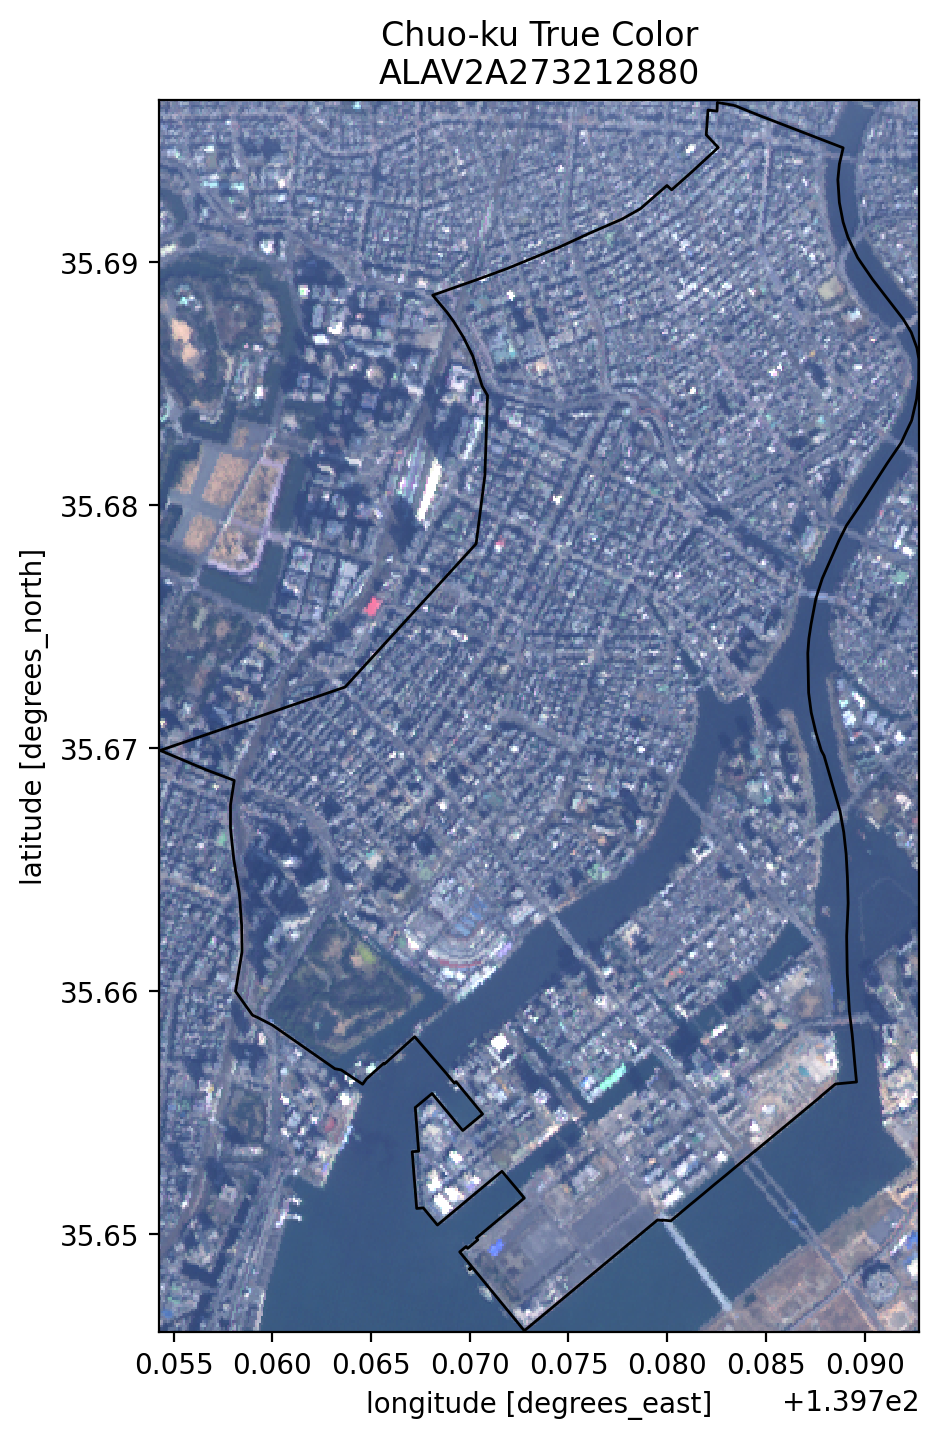

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
clipped_data.sel(band=[1, 2, 3]).astype("uint8").plot.imshow(ax=ax)
chuo_ku_gdf.plot(ax=ax, color="none")
ax.set_title(f"Chuo-ku True Color\n{scene['tellus:name']}")
print(avnir2_dataset["copyright"])

Next, display the [False Color](https://en.wikipedia.org/wiki/False_color) image.

©JAXA


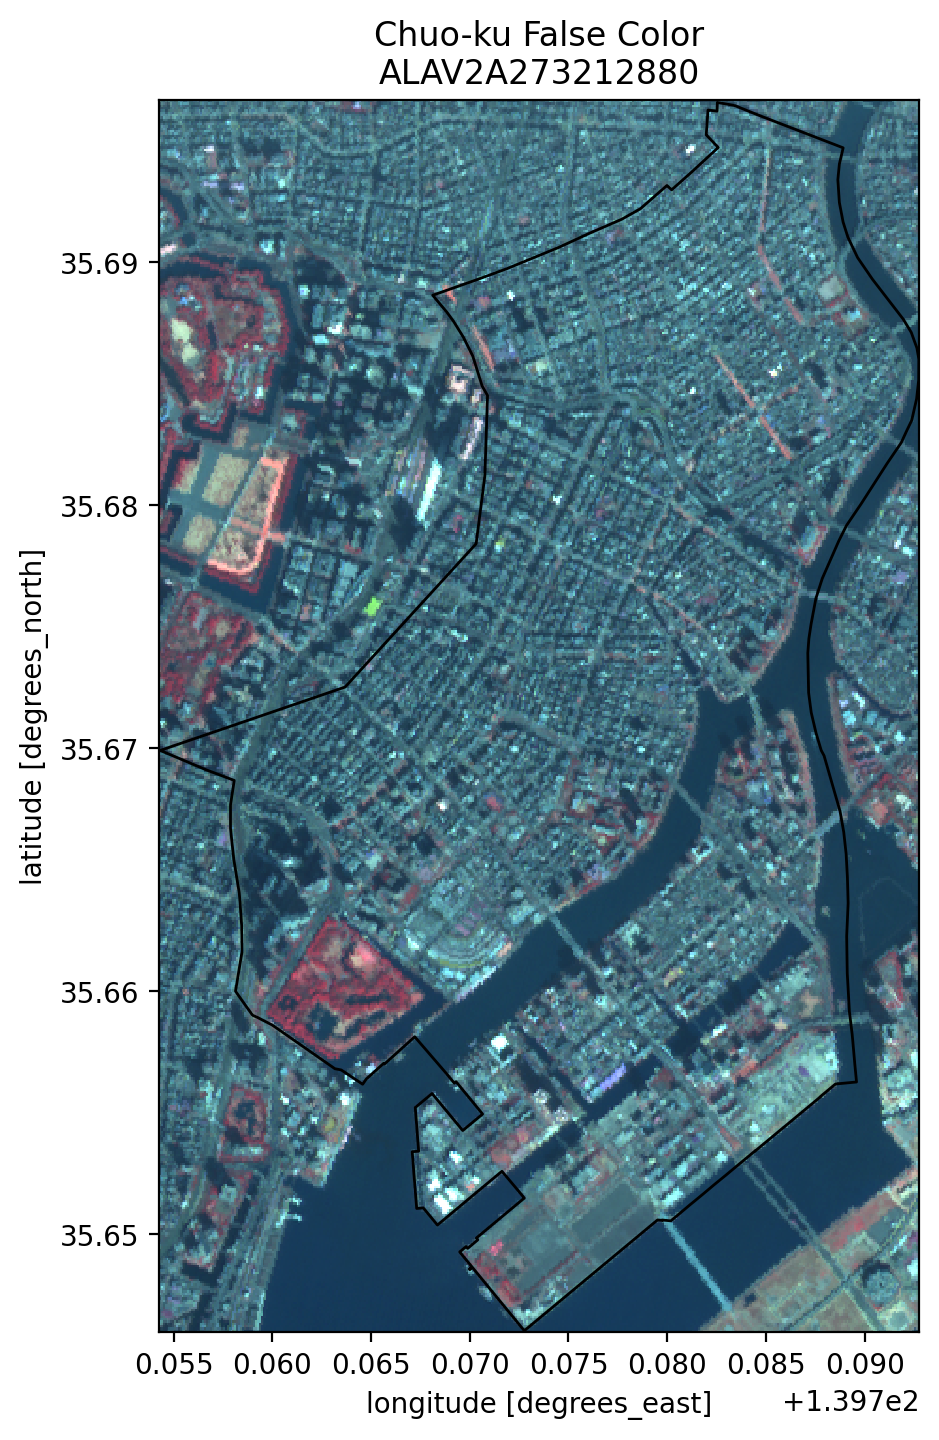

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
clipped_data.sel(band=[4, 1, 2]).astype("uint8").plot.imshow(ax=ax)
chuo_ku_gdf.plot(ax=ax, color="none")
ax.set_title(f"Chuo-ku False Color\n{scene['tellus:name']}")
print(avnir2_dataset["copyright"])

You can observe that vegetation is highlighted in red.